<a href="https://colab.research.google.com/github/MahekSayyad/CodeClauseInternship_FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing** **Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading Data:**

In [12]:
file_path = 'data.csv'

In [5]:
def load_data(file_path, nrows=None):
    df = pd.read_csv(file_path, delimiter=',', nrows=nrows)
    return df

## **Exploratory Data Analysis (EDA) functions**

In [6]:
def plot_distribution_per_column(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    n_row, n_col = df.shape
    column_names = list(df)
    n_graph_row = (n_col + n_graph_per_row - 1) // n_graph_per_row
    plt.figure(figsize=(6 * n_graph_per_row, 8 * n_graph_row), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(n_col, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_df = df.iloc[:, i]
        if not np.issubdtype(type(column_df.iloc[0]), np.number):
            value_counts = column_df.value_counts()
            value_counts.plot.bar()
        else:
            column_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [16]:
def plot_correlation_matrix(df, graph_width):
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
    corr_mat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_mat)
    plt.title(f'Correlation Matrix for {file_path}', fontsize=15)
    plt.show()

In [8]:
def plot_scatter_matrix(df, plot_size, text_size):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    column_names = list(df)
    if len(column_names) > 10:
        column_names = column_names[:10]
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center',
                          size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# **Main code**

In [13]:
n_rows_read = 1000
file_name = 'data.csv'
df = load_data(os.path.join(data_path, file_name), nrows=n_rows_read)



# **Display** **dataset information**

In [14]:
n_row, n_col = df.shape
print(f'There are {n_row} rows and {n_col} columns')
df.head(5)

There are 1000 rows and 4 columns


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


# **EDA visualizations**

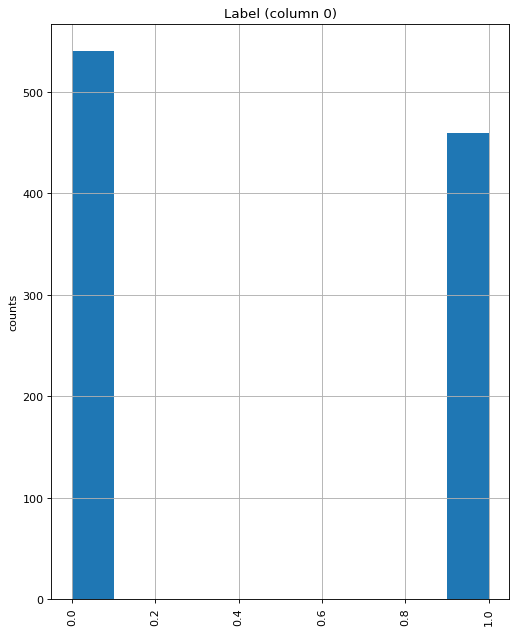

<ipython-input-16-33deb135ba94>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-16-33deb135ba94>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


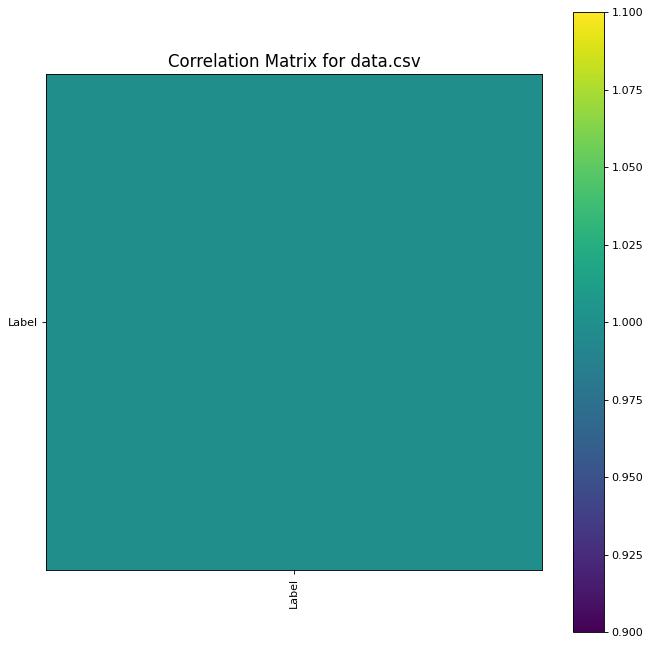

<ipython-input-8-00652f0b9936>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


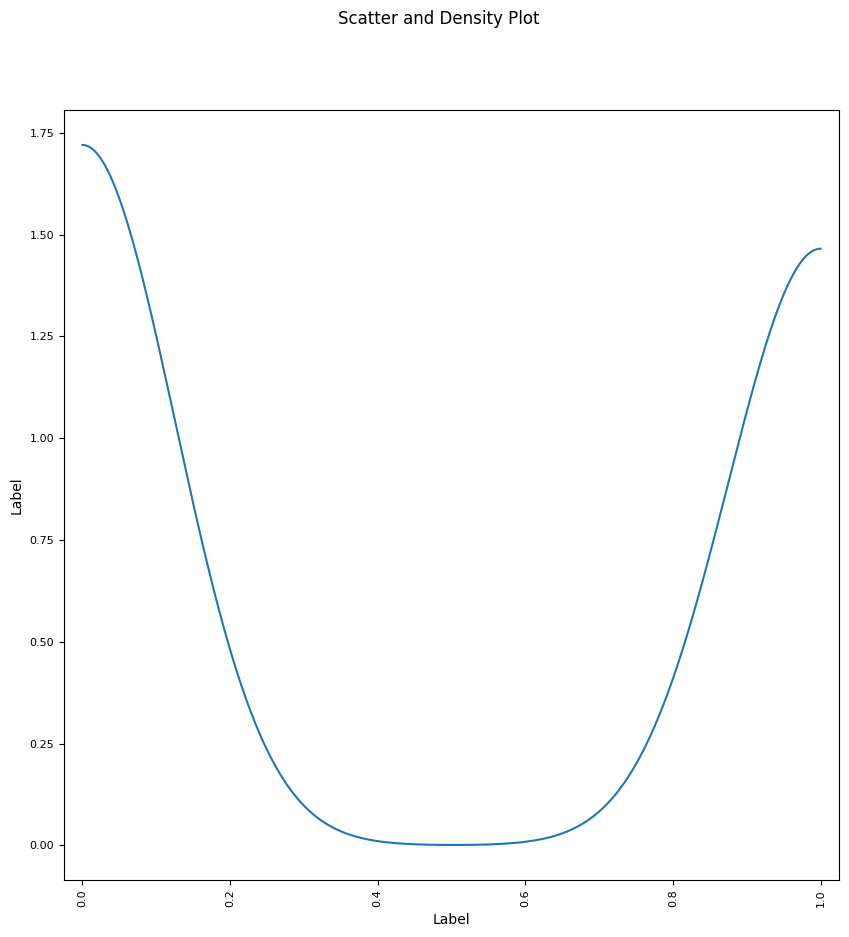

In [17]:
plot_distribution_per_column(df, 10, 5)
plot_correlation_matrix(df, graph_width=10)
plot_scatter_matrix(df, plot_size=10, text_size=12)